# House Price prediction using Multiple Linear Regression

We are building a Multiple linear regression model here in order to predict the price of a house based on its features like space, area and other aspects. 

In [2]:
#getting packages
import pandas as pd# For manipulating the data
import numpy as np # For mathematical calculations
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting graphs
%matplotlib inline
import warnings # For error messages

In [3]:
#getting the dataset

file_path = 'C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets for ML\\Regression\\Transformed_Housing_Data2.csv'

data = pd.read_csv(file_path)
data.head()


,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
#getting description of the data
data.describe()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,...,0.007543,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,2.500620e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,...,0.086525,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#getting null values in each column
data.isnull().sum()


Sale_Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
No of Times Visited                          0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Years Since Renovation                       0
Condition_of_the_House_Excellent             0
Condition_of_the_House_Fair                  0
Condition_of_the_House_Good                  0
Condition_of_the_House_Okay                  0
Ever_Renovated_Yes                           0
Waterfront_Vi

In [6]:
#values in sale price variable before deleting outliers
print("Before deleting outliers length = " , len(data.Sale_Price))

Before deleting outliers length =  21609


In [7]:
# Calculating mean and standard deviation of Sale_Price
mean_price = data['Sale_Price'].mean()
std_dev = data['Sale_Price'].std()
print(mean_price)
print(std_dev)

511618.55814706837
250062.01350117987


In [8]:
# Defining the threshold for removing rows
threshold = 2 * std_dev




In [9]:
# Filter rows where SalePrice is within 2 standard deviations from the mean
filtered_data = data[(data['Sale_Price'] >= (mean_price - threshold)) & (data['Sale_Price'] <= (mean_price + threshold))]
filtered_data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
#removing outliers from sale price column
print("After deleting outliers length = " , len(filtered_data.Sale_Price))

After deleting outliers length =  20173


In [11]:
#outliers count 
print("The outliers removed total around = " , len(data.Sale_Price)-len(filtered_data.Sale_Price))

The outliers removed total around =  1436


In [12]:
#segregating numerical and categorical columns
Numerical_Type = data.iloc[:,0:16]
Categorical_Type = data.iloc[:, 16:]
numerical_features = data[Numerical_Type.columns]

categorical_features = data[Categorical_Type.columns]
numerical_features,categorical_features

(       Sale_Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  \
 0        221900.0               3             1.00               1180.0   
 1        538000.0               3             2.25               2570.0   
 2        180000.0               2             1.00                770.0   
 3        604000.0               4             3.00               1960.0   
 4        510000.0               3             2.00               1680.0   
 ...           ...             ...              ...                  ...   
 21604    360000.0               3             2.50               1530.0   
 21605    400000.0               4             2.50               2310.0   
 21606    402101.0               2             0.75               1020.0   
 21607    400000.0               3             2.50               1600.0   
 21608    325000.0               2             0.75               1020.0   
 
        Lot Area (in Sqft)  No of Floors  No of Times Visited  Overall Grade  \
 0    

In [13]:
#building a correlation heatmap
def correlation_heatmap(numerical_features):
    _, ax = plt.subplots(figsize=(25, 20))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(numerical_features.corr(), annot=True, cmap=colormap, fmt=".2f", linewidths=.5, ax=ax)


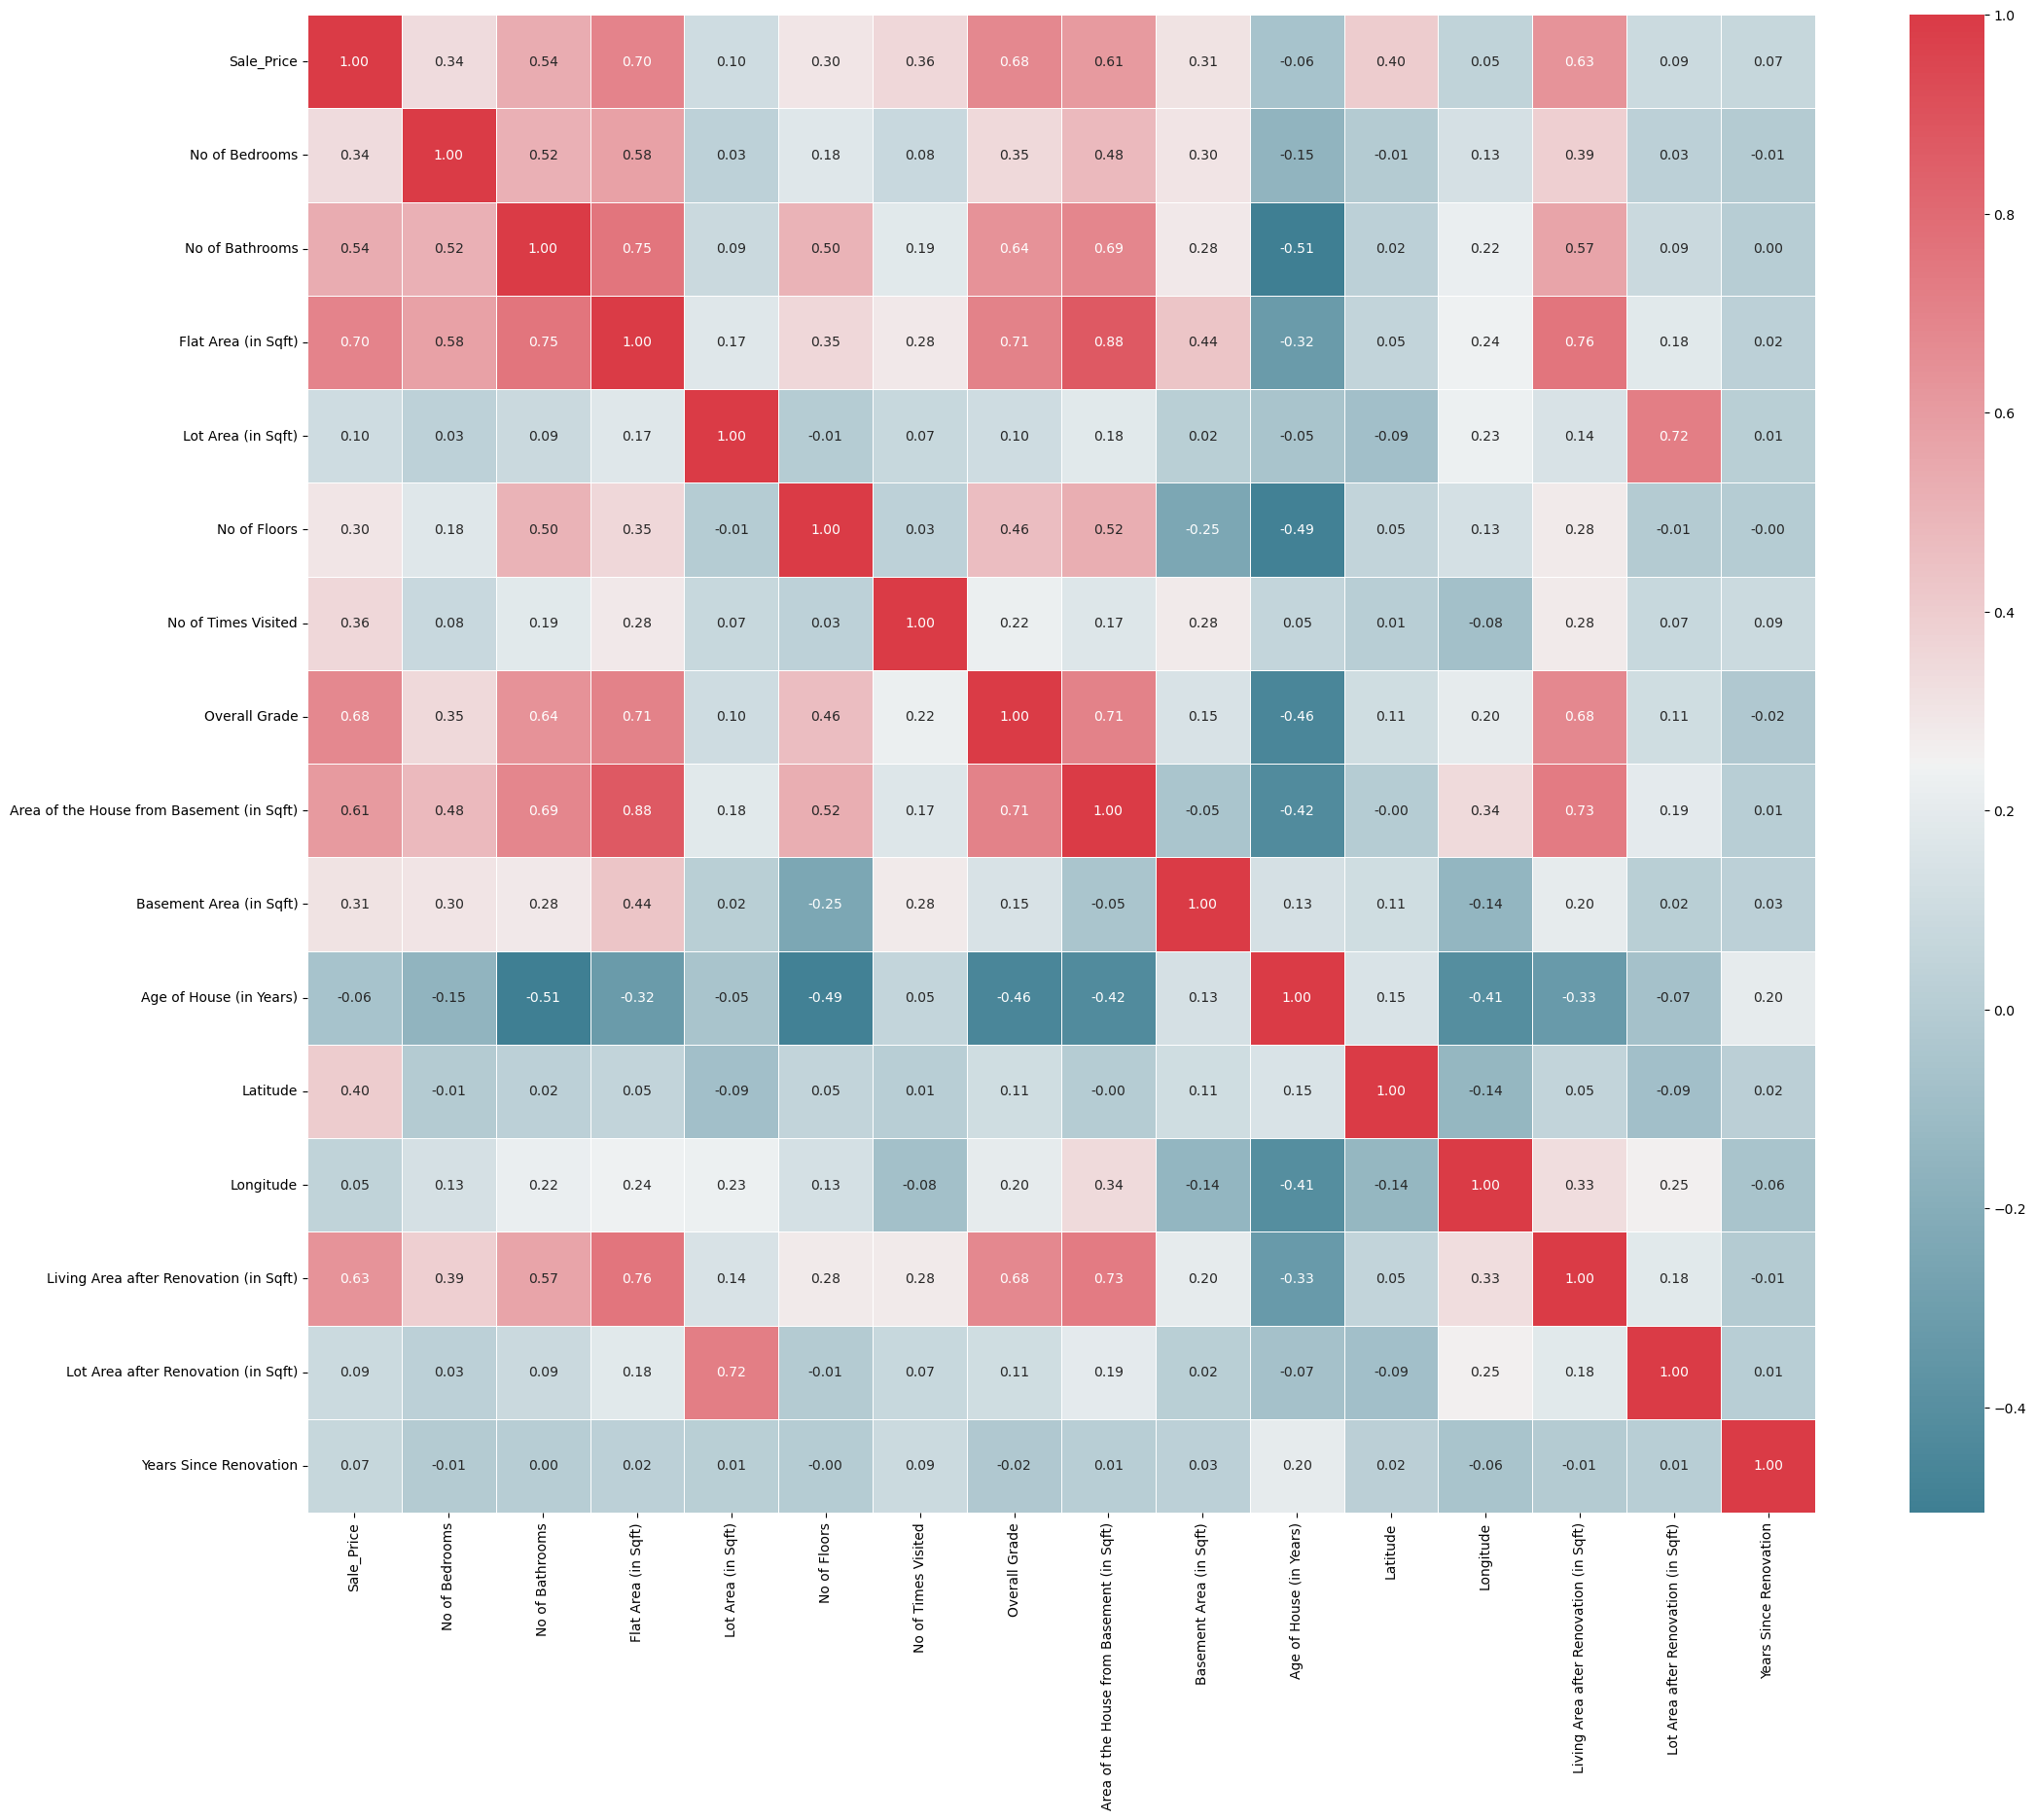

In [14]:
#plotting the heatmap
correlation_heatmap(numerical_features)
plt.show()

The following variables have a positive correlation with the saleprice of the apartment:
1)low- bedroom, floors, number of times visited,basement area
2)moderate- bathroom
3)significant-flat area,overall grade,area of house from basement,living area

In [15]:
#seperating independent and dependent variables
data_x = data.drop(['Sale_Price'], axis=1)
data_y = data['Sale_Price']

In [16]:
#splitting the dataset into train,test and validation
from sklearn.model_selection import train_test_split as tts
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size
= 0.2 , random_state = 50)
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size =
0.2 , random_state = 51)


In [17]:
#building the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()


In [18]:
# Training the model on the training set
linear_model.fit(train_x, train_y)

LinearRegression()

In [19]:
# Predicting on the validation set
val_predictions = linear_model.predict(val_x)

In [20]:
# Evaluating the model on the validation set
val_mse = mean_squared_error(val_y, val_predictions)
print(f'Mean Squared Error on Validation Set: {val_mse}')


Mean Squared Error on Validation Set: 9765406197.364662


In [21]:
# Predicting on the test set
test_predictions = linear_model.predict(test_x)

In [22]:
# Evaluating the model on the test set
test_mse = mean_squared_error(test_y, test_predictions)
print(f'Mean Squared Error on Test Set: {test_mse}')

Mean Squared Error on Test Set: 10023945275.436543


In [23]:
# Getting the StandardScaler and running it
from sklearn.preprocessing import StandardScaler


ss = StandardScaler()



In [25]:
# Fitting and transforming all the sets
train_x = ss.fit_transform(train_x)

test_x = ss.transform(test_x)

val_x = ss.transform(val_x)


C:\Users\sujoydutta\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\sujoydutta\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [33]:
#splitting the dataset again 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size
= 0.2, random_state=86)
train_x, val_x, train_y, val_y = train_test_split(data_x, data_y, test_size
= 0.2, random_state=42)

In [34]:
# Training the model on the training set
linear_model.fit(train_x, train_y)

LinearRegression()

In [35]:
# Predicting on the test set
test_predictions = linear_model.predict(test_x)

In [36]:
# Evaluating the model on the test set
test_mse = mean_squared_error(test_y, test_predictions)
print(f'Mean Squared Error on Test Set: {test_mse}')

Mean Squared Error on Test Set: 9938686947.324406


In [37]:
# Predicting on the validation set
val_predictions = linear_model.predict(val_x)

In [38]:
# Evaluating the model on the validation set
val_mse = mean_squared_error(val_y, val_predictions)
print(f'Mean Squared Error on Validation Set: {val_mse}')

Mean Squared Error on Validation Set: 9953546811.365582


Remark:There is significant reduction in MSE after scaling the dataset. Validation set has lower MSE than test set.